In [28]:
%run data_downloader.py

Data loaded


<Figure size 640x480 with 0 Axes>

In [29]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from os import path

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [30]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data [5 pts] 

1. Fix data types
2. Remove null or undefined values 
3. Drop the column car_name

Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

Hint: 1. Dtype of one column is incorrect.  

In [31]:
if "car_name" in df.columns:
    df = df.drop(columns="car_name")

df['horsepower'] = pd.to_numeric(df['horsepower'],errors="coerce")
df = df.dropna()
print(df.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

Best predictor: weight, r^2: 0.69


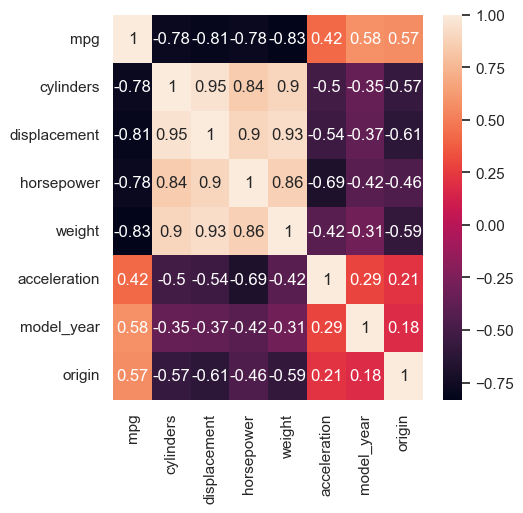

In [32]:
mpg_corr = df.corr()["mpg"].drop("mpg").sort_values()

top = [smf.ols(formula='mpg ~ {}'.format(predictor),data=df) for predictor in mpg_corr.index.values[:4]]

best_predictor=''
best_r_squared=0
for model in top:
    res = model.fit()
    if(res.rsquared>best_r_squared):
        best_r_squared = res.rsquared
        best_predictor = res.params.index[1]

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

print("Best predictor: {}, r^2: {:.2}".format(best_predictor,best_r_squared))

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result?
Hint: For N-degree polynomial fit, **you have to include all orders upto N**. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand **`np.power(x,n)`** function to include a feature representing $x^n$.

For example, the formula for n = 4 ---> mpg ~ weight + np.power(weight,2) + np.power(weight,3) + np.power(weight,4)

In [33]:
def build_formula(degree:int, variable:str):
    formula = 'mpg ~ {}'.format(variable)
    to_power = ' + np.power({},{})'
    for i in range(2,degree+1):
        formula += to_power.format(variable,i)
    return smf.ols(formula=formula,data=df)

polinomial_models = [build_formula(i,best_predictor) for i in range(1,11)]
best_r_squared =0
best_degree = 0
results = []
for i, model in enumerate(polinomial_models):
    res = model.fit()
    if(res.rsquared>best_r_squared):
        best_r_squared = res.rsquared
        best_degree = i+1
    results.append(res)
    
print("Best degree {}, with r^2 {:0.3}".format(best_degree,best_r_squared))
sound_degree = 1

Best degree 3, with r^2 0.715


In [34]:
for result in results:
    print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          6.02e-102
Time:                        14:55:33   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.0

### 1d) Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value.
Run training with polynomial models with polynomial degrees up to 20. Print out each polynomial degree and $R^2$ value. What do you observe from the result? What are the best_degree and best_r_qaured just based on $R^2$ value?
Inspect model summary from each model. What is the highest order model that makes sense (fill the value for the sound_degree)? 

Note: For N-degree polynomial fit, you have to include all orders upto N.

In [35]:
df['weight_norm'] = df['weight']/df['weight'].mean()
# your code here
polinomial_models = [build_formula(i,'weight_norm') for i in range(1,21)]
best_r_squared = 0
results = []
for i, model in enumerate(polinomial_models):
    res = model.fit()
    if(res.rsquared>best_r_squared):
        best_r_squared = res.rsquared
        best_degree = i+1
    print("Degree: {}, r^2 {}".format(i+1,res.rsquared))
    results.append(res)
print("-"*10)
print("Best degree {}, with r^2 {}".format(best_degree,best_r_squared))
sound_degree = 2

Degree: 1, r^2 0.6926304331206254
Degree: 2, r^2 0.7151475557845139
Degree: 3, r^2 0.7151495954869257
Degree: 4, r^2 0.7154806032756432
Degree: 5, r^2 0.7160964869848935
Degree: 6, r^2 0.7165638483082098
Degree: 7, r^2 0.7177879568840745
Degree: 8, r^2 0.7177992979709874
Degree: 9, r^2 0.7182083307109397
Degree: 10, r^2 0.71989128049093
Degree: 11, r^2 0.7209101749117204
Degree: 12, r^2 0.7209276395127089
Degree: 13, r^2 0.7227919110988218
Degree: 14, r^2 0.7240040907279015
Degree: 15, r^2 0.7238304071720671
Degree: 16, r^2 0.7242819155770792
Degree: 17, r^2 0.7243901068225285
Degree: 18, r^2 0.7244189746935938
Degree: 19, r^2 0.7244319690768319
Degree: 20, r^2 0.7245255500649708
----------
Best degree 20, with r^2 0.7245255500649708


# 2. Multi-Linear Regression
In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [36]:
votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,Alachua,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library.
Upload a screenshot or saved copy of your plot for this week's Peer Review assignment.<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

C:\Users\OM-FI\AppData\Local\Temp\ipykernel_32020\1996435854.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(votes.corr(),annot=True)


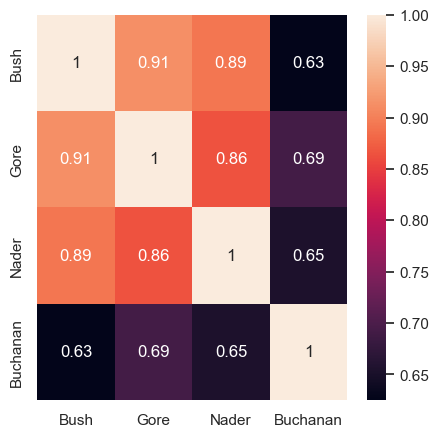

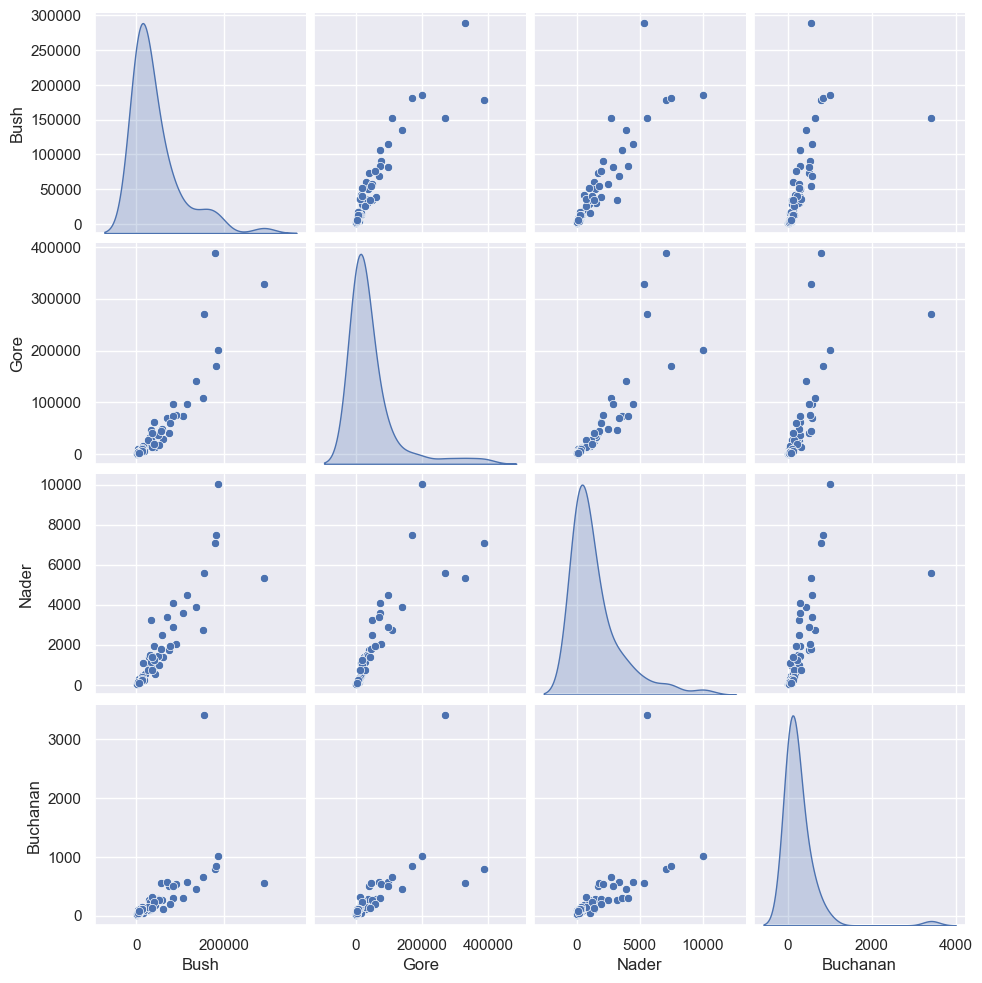

In [37]:
plt.figure(figsize=(5,5))
if not path.exists("before_votes_outliers_remove.png"):
    sns.heatmap(votes.corr(),annot=True)
    sns.pairplot(votes,diag_kind='kde')
    plt.savefig('before_votes_outliers_remove.png', dpi = 300, bbox_inches = 'tight')

In the block below you can see an alternative to get rid of outliers

dtype('int64')

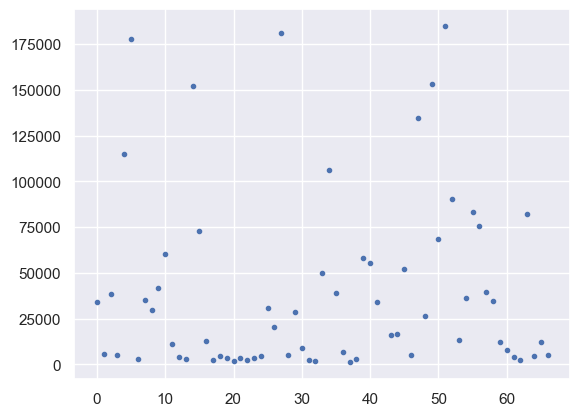

In [38]:
df = pd.to_numeric(votes['Bush'],errors="coerce")
df = df.dropna()
q = df.quantile(0.99)
df = df[df < q]
df.plot(style='.')
df.dtype

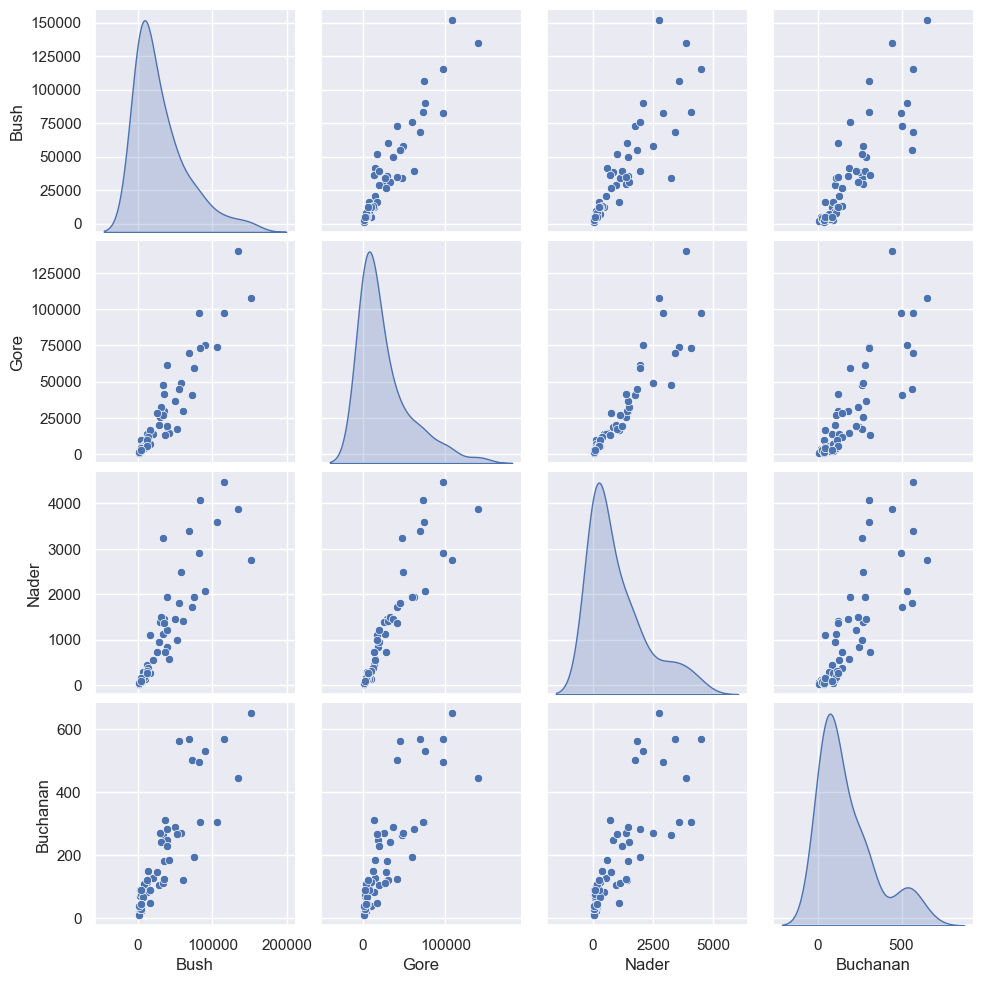

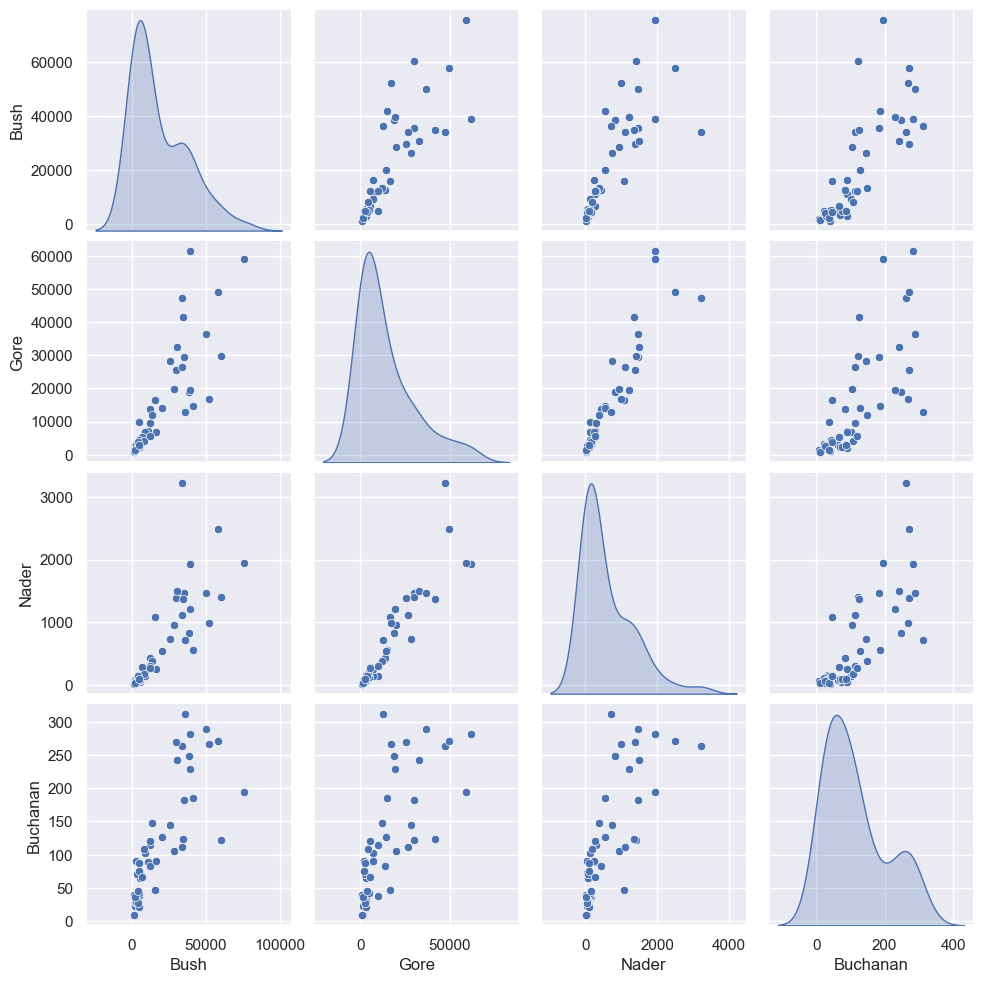

In [39]:
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)


if not path.exists("after_votes_outliers_remove.png"):
    drop_numerical_outliers(votes,1.95)
    sns.pairplot(votes,diag_kind='kde')
    plt.savefig('after_votes_outliers_remove.png', dpi = 300, bbox_inches = 'tight')
drop_numerical_outliers(votes,1.95)
sns.pairplot(votes,diag_kind='kde')

Before removing outliers<br>
<img src="before_votes_outliers_remove.png"  width="30%" height="30%"><br>
After removing outliers<br>
<img src="after_votes_outliers_remove.png"  width="30%" height="30%">

### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Collinear?
### 2c. Multi-linear 
Construct a multi-linear model called `model` without interaction terms predicting the Bush column on the other columns and print out the summary table. You should name your model's object as `model` in order to pass the autograder. Use the full data (not train-test split for now) and do not scale features.

In [40]:
votes_complete = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')

params = ['Gore', 'Nader', 'Buchanan']
model = smf.ols(formula='Bush ~ '+' + '.join(params),data=votes_complete).fit()
model_no_interaction = model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bush   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.35e-28
Time:                        14:55:49   Log-Likelihood:                -758.33
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8647.6837   3133.545      2.760      0.008    2385.793    1.49e+04
Gore           0.4475      0.071      6.305      0.000       0.306       0.589
Nader         11.8533      2.503      4.735      0.000       6.851      16.855
Buchanan      -7.2033      7.864     -0.916      0.363     -22.917       8.511
==============================================================================
Omnibus:                       20.698   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.017
Skew:                           0.383   Prob(JB):                     1.59e-28
Kurtosis:                       9.728   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Is there any insignificant feature(s)? 

### 2d. Multi-linear with interactions

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions that do not meet the $p = 0.05$ threshold. You will share your solution in this week's Peer Review assignment. 

Note: Name this model object as **`model_multi`**.

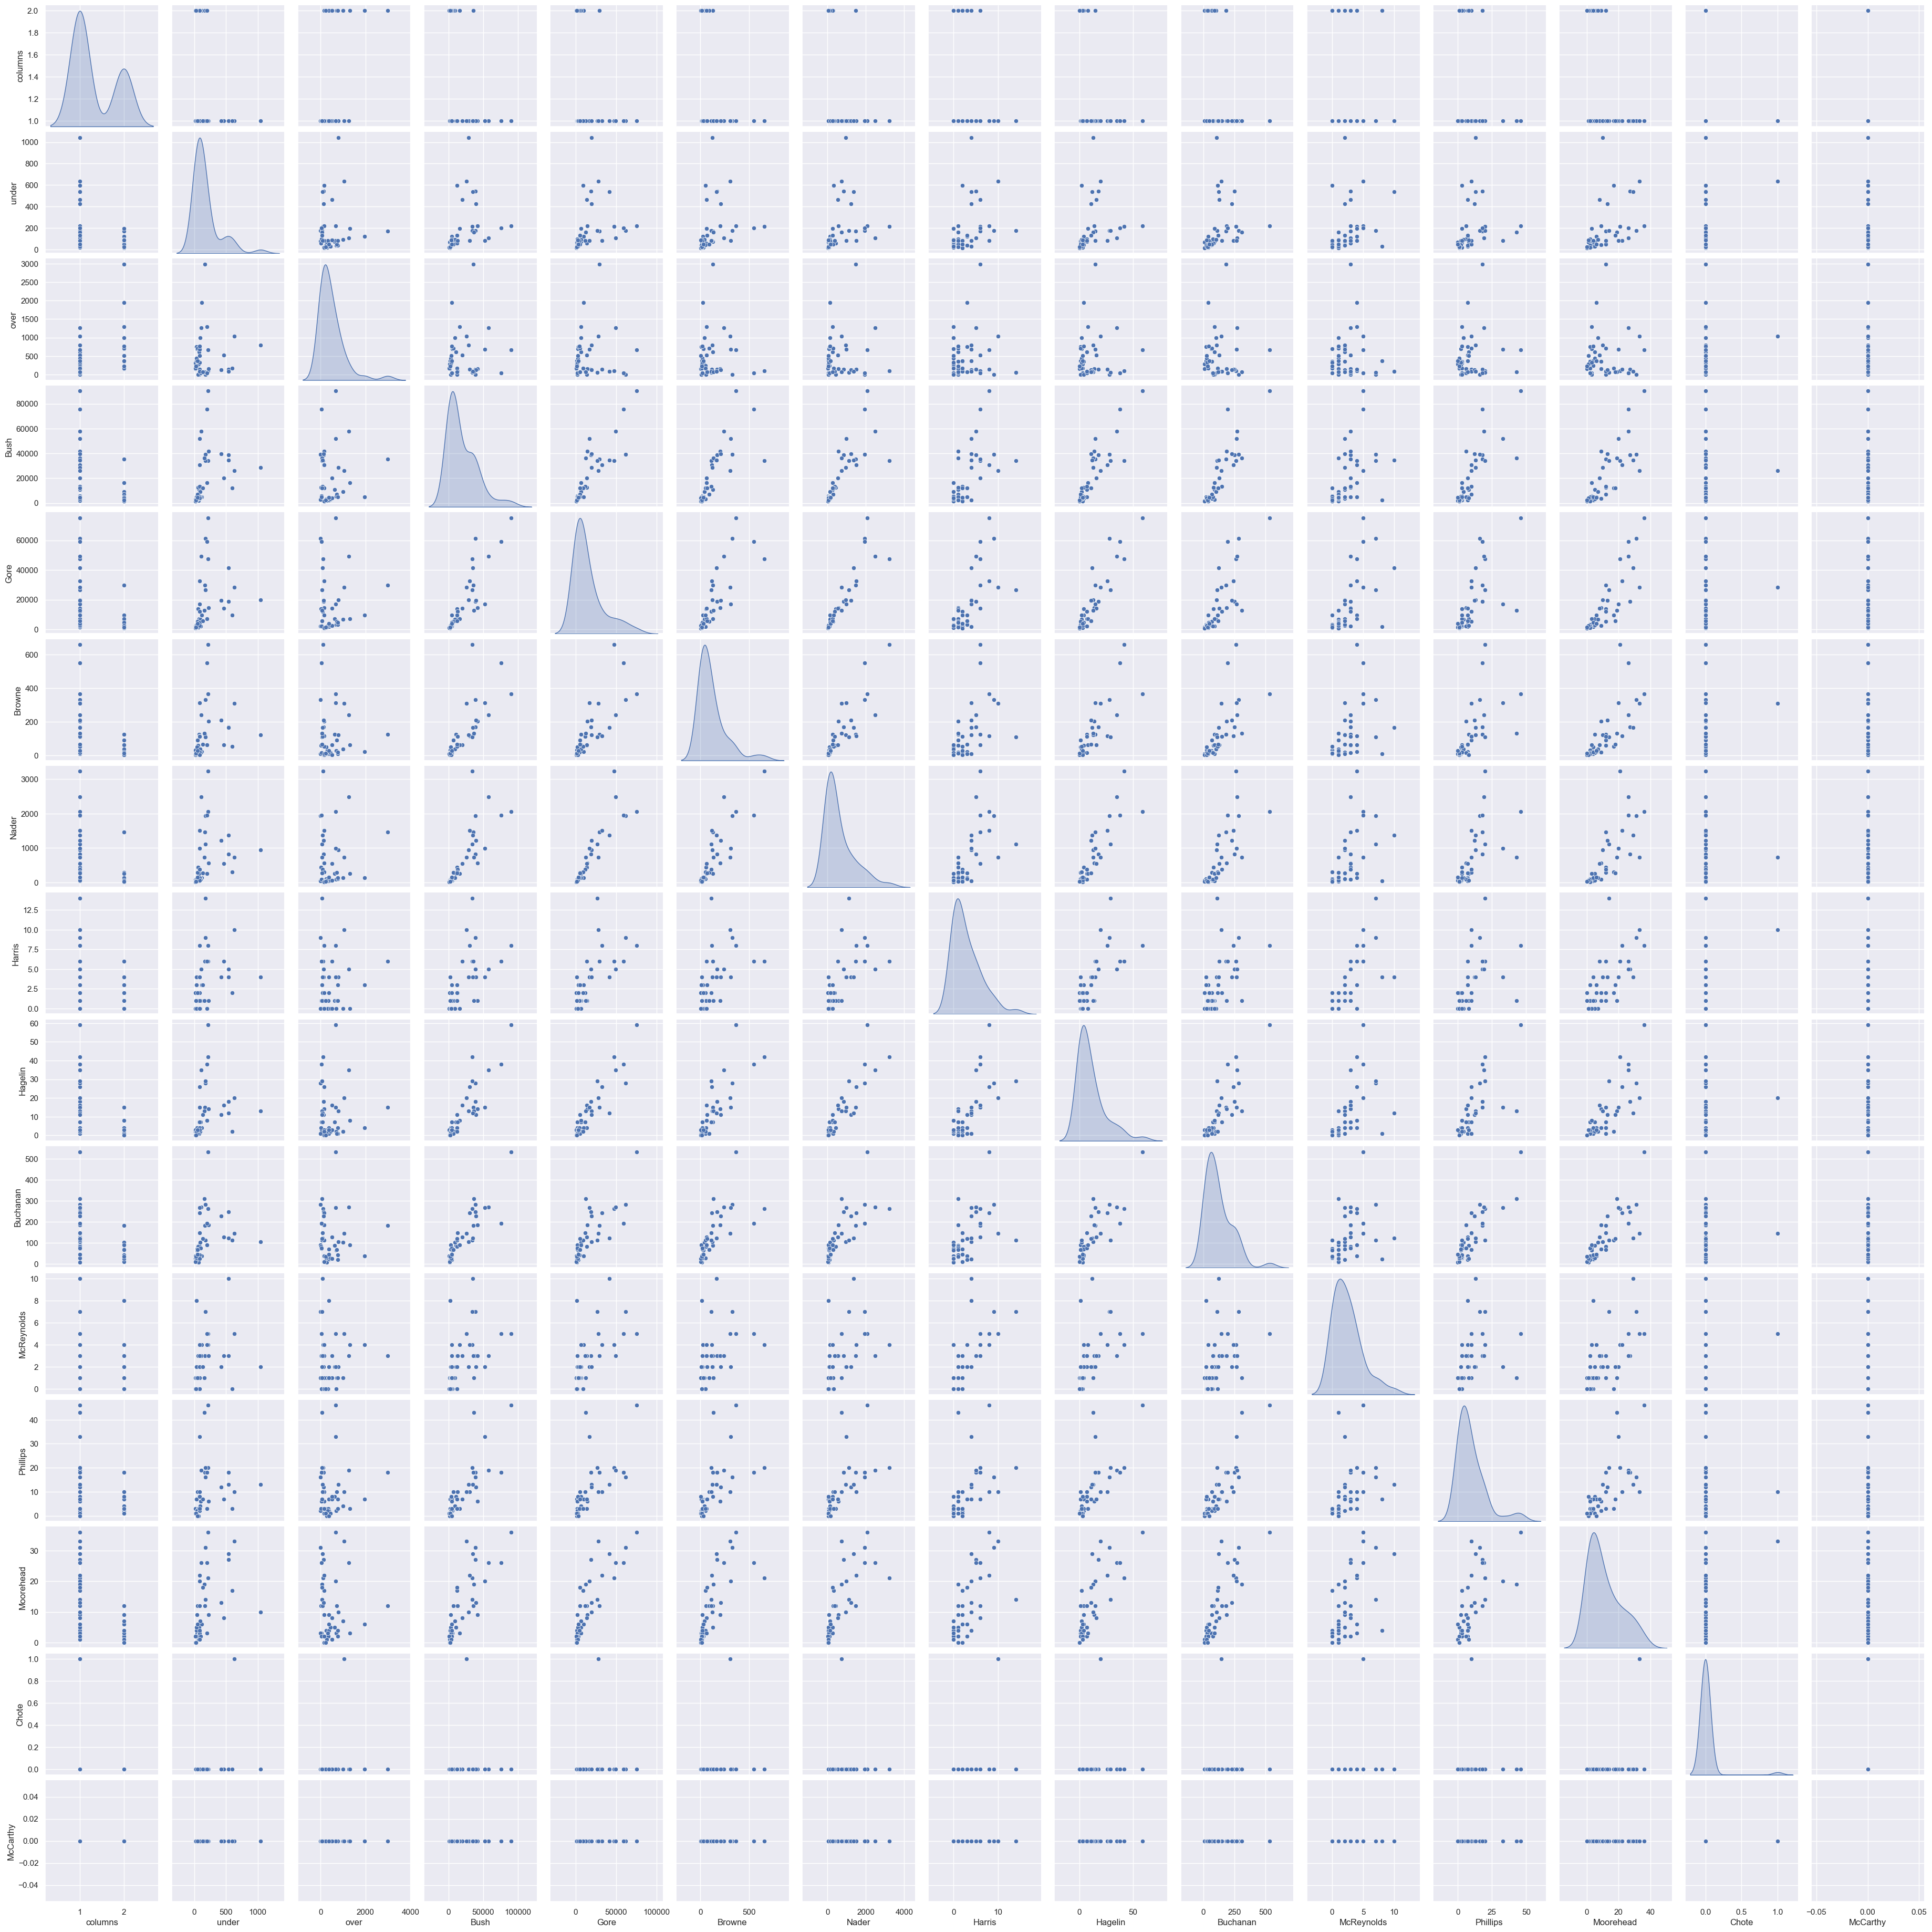

In [54]:
if not path.exists("all_votes.png"):
    drop_numerical_outliers(votes_complete)
    sns.pairplot(votes_complete,diag_kind='kde')
    plt.savefig('all_votes.png', dpi = 50, bbox_inches = 'tight')

In [42]:

model_params = []
for column in params:
    formula = 'Bush ~ ' + column
    model = smf.ols(formula=formula,data=votes)
    res = model.fit()
    if(res.pvalues[1]<0.05):
        model_params.append(column)
    print("P value of {} is: {}".format(column,res.pvalues[1]))
formula = 'Bush ~ '+ ' + '.join(params)+"+ C(county) -1"
model_multi = smf.ols(formula=formula,data=votes_complete).fit()

P value of Gore is: 6.828729112993541e-16
P value of Nader is: 6.592224669641027e-18
P value of Buchanan is: 4.564947415040989e-14


In [43]:
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                nan
Time:                        14:55:56   Log-Likelihood:                 815.34
No. Observations:                  67   AIC:                            -1497.
Df Residuals:                       0   BIC:                            -1349.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(county)[Alachua]      -3

c:\Users\OM-FI\Documents\Projects\iml\Introduction to Supervised Learning\Multiple Linear Regresion\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\OM-FI\Documents\Projects\iml\Introduction to Supervised Learning\Multiple Linear Regresion\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\OM-FI\Documents\Projects\iml\Introduction to Supervised Learning\Multiple Linear Regresion\venv\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


### 2e. Leverage [Peer Review]

Plot the *leverage* vs. the square of the residual.

These resources might be helpful    
- https://rpubs.com/Amrabdelhamed611/669768
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

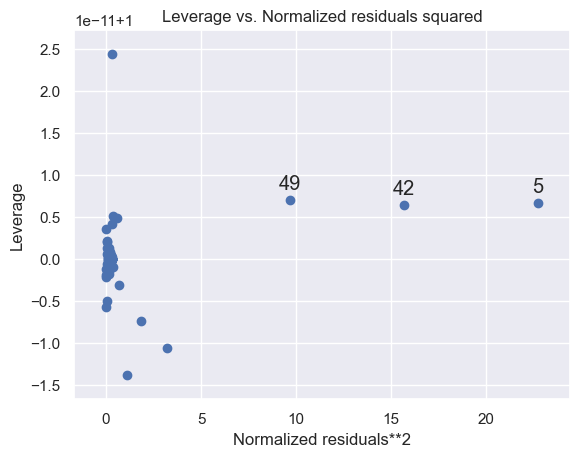

In [44]:
sm.graphics.plot_leverage_resid2(model_multi)
plt.show()

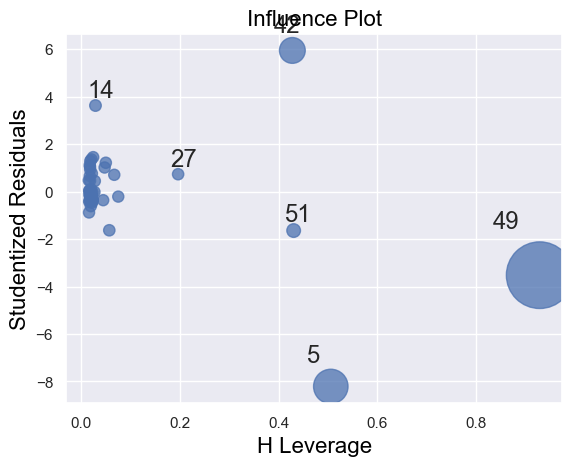

In [45]:
sm.graphics.influence_plot(model_no_interaction)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 500x2500 with 0 Axes>

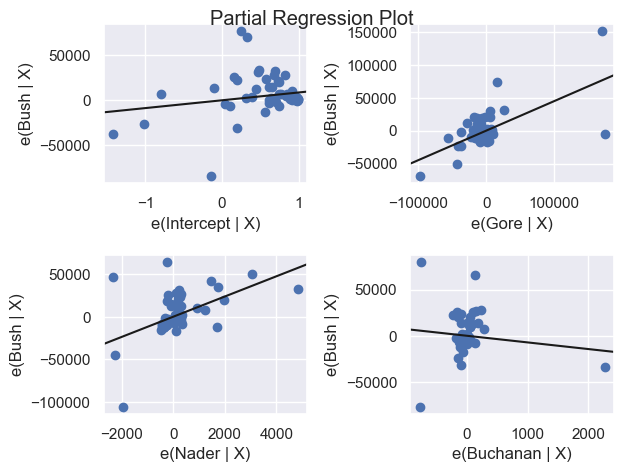

<Figure size 500x2500 with 0 Axes>

In [46]:
sm.graphics.plot_partregress_grid(model_no_interaction)
plt.figure(figsize=(5,25))

### 2f. Identify and Clean

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *3 or more* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

Name the list of indices for those high-leverage and/or high-residual points as `unusual`.

In [47]:
unusual = [5,42,49]
# your code here
print(votes_complete.loc[unusual])

       county technology  columns  under   over    Bush    Gore  Browne  \
5     Broward  Votomatic        1   4946   7826  177902  387703    1217   
42  MiamiDade  Votomatic        1  10570  17833  289533  328808     762   
49  PalmBeach  Votomatic        2  10134  19218  152951  269732     743   

    Nader  Harris  Hagelin  Buchanan  McReynolds  Phillips  Moorehead  Chote  \
5    7104      54      135       795          37        74        122      0   
42   5352      87      119       560          35        69        124      0   
49   5565      45      143      3411         302       190        104      0   

    McCarthy  
5          0  
42         0  
49         0  


### 2g. Final model

Develop your final model by dropping *one or more* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95. Call your model `model_final`.

In [48]:
model_final = smf.ols(formula=formula,data=votes_complete.drop(unusual)).fit()

In [49]:
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                nan
Time:                        14:55:57   Log-Likelihood:                 886.91
No. Observations:                  64   AIC:                            -1646.
Df Residuals:                       0   BIC:                            -1508.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(county)[Alachua]      -1

c:\Users\OM-FI\Documents\Projects\iml\Introduction to Supervised Learning\Multiple Linear Regresion\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\OM-FI\Documents\Projects\iml\Introduction to Supervised Learning\Multiple Linear Regresion\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\OM-FI\Documents\Projects\iml\Introduction to Supervised Learning\Multiple Linear Regresion\venv\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


## 3. Body Mass Index Model
In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** method to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.